#Statement

The malware industry remains a well-organized and well-funded marketplace dedicated to evading traditional security measures. Once a computer is infected with malware, criminals can harm consumers and businesses in many ways. For this reason, this problem becomes a data science problem, where the goal is to predict whether or not computers will be infected, thus saving the company a cost that is not exclusively monetary and can go much further. Thus, as Data Science Juniors we are faced with a Classification problem (Supervised Learning), where our target will be the variable 'HasDetections'.

In order to maintain the explainability throughout the project, a Decesion Tree has been used, where through the variables used in the dataset, it performs a weighting of the entropy reduction (metric used in this case) with the obtaining of the maximum number of observations. In this case the variable Census_TotalPhysicalRAM separates the data set by 11% and 89%, while reducing the entropy a little, as a result of maximizing the information gain(IG).

It should be noted when interpreting the results of our model, that the target is distributed in a ratio of 50/50, so when interpreting the average result of hits must be taken into account because a result close to 50%, would be showing that our model does not predict well.

The data correspond to the Kaggle competition of Microsoft Malware Prediction, although in this case the train set has been used for the realization of the project. For this reason and because of the amount of data, it was decided to perform a K_fold instead of splitting the dataset.


#Importing

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import missingno as msno

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold

from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_mmp.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (29,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#1. Data understanding

### 1.1 Data size

In [ ]:
df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Columns: 84 entries, Unnamed: 0 to HasDetections
dtypes: float64(36), int64(18), object(30)
memory usage: 320.4+ MB


In this dataframe it can be seen that it is composed of 500,000 rows, with 84 columns where 54 are variables containing nuemric data and 30 are variables with categorical data.

### 1.2 Data first visulization

In [ ]:
df.columns

In [ ]:
df.head().T

### 1.3 Display of attributes and basic descriptive statistics

In [ ]:
df.select_dtypes(exclude= np.number).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 30 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   MachineIdentifier                 500000 non-null  object
 1   ProductName                       500000 non-null  object
 2   EngineVersion                     500000 non-null  object
 3   AppVersion                        500000 non-null  object
 4   AvSigVersion                      500000 non-null  object
 5   Platform                          500000 non-null  object
 6   Processor                         500000 non-null  object
 7   OsVer                             500000 non-null  object
 8   OsPlatformSubRelease              500000 non-null  object
 9   OsBuildLab                        499999 non-null  object
 10  SkuEdition                        500000 non-null  object
 11  PuaMode                           126 non-null     object
 12  Sm

At a first glance it can be seen that some categorical columns contain nulls. These will be treated later depending on the quantity and their distribution.

In [ ]:
df.select_dtypes(include= np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,500000.0,4.458888e+06,2.575619e+06,2.0,2227692.50,4461367.5,6.690936e+06,8.921471e+06
IsBeta,500000.0,2.000000e-06,1.414214e-03,0.0,0.00,0.0,0.000000e+00,1.000000e+00
RtpStateBitfield,498168.0,6.846207e+00,1.023049e+00,0.0,7.00,7.0,7.000000e+00,3.500000e+01
IsSxsPassiveMode,500000.0,1.724200e-02,1.301720e-01,0.0,0.00,0.0,0.000000e+00,1.000000e+00
DefaultBrowsersIdentifier,24061.0,1.652825e+03,1.004754e+03,1.0,788.00,1632.0,2.381000e+03,3.209000e+03
AVProductStatesIdentifier,498062.0,4.785091e+04,1.402309e+04,3.0,49480.00,53447.0,5.344700e+04,7.049200e+04
AVProductsInstalled,498062.0,1.326763e+00,5.229999e-01,1.0,1.00,1.0,2.000000e+00,5.000000e+00
AVProductsEnabled,498062.0,1.020714e+00,1.666080e-01,0.0,1.00,1.0,1.000000e+00,4.000000e+00
HasTpm,500000.0,9.878160e-01,1.097068e-01,0.0,1.00,1.0,1.000000e+00,1.000000e+00
CountryIdentifier,500000.0,1.080375e+02,6.306854e+01,1.0,51.00,97.0,1.620000e+02,2.220000e+02


DWithin a first analysis of the numerical variables, a misclassification of Boolean (categorical) variables can be observed, noticeable in their quartiles and maxima and minima, as follows: IsBeta,Census_IsWIMBootEnabled, HasTpm, IsProtected, AutoSampleOptIn, SMode, Firewall, Census_HasOpticalDiskDrive, Census_IsPortableOperatingSystem, Census_IsFlightingInternal, Census_IsFlightsDisabled, Census_ThresholdOptIn, Census_IsSecureBootEnabled, Census_IsVirtualDevice, Census_IsTouchEnabled, Census_IsPenCapable, Census_IsAlwaysOnAlwaysConnectedCapable, Wdft_IsGamer.


In [ ]:
df.select_dtypes(exclude= np.number).describe().T

,count,unique,top,freq
MachineIdentifier,500000,500000,f1cd864e97bae82bdf96523e1a539121,1
ProductName,500000,3,win8defender,494604
EngineVersion,500000,53,1.1.15200.1,216491
AppVersion,500000,95,4.18.1807.18075,288809
AvSigVersion,500000,6455,1.273.1420.0,5771
Platform,500000,4,windows10,483048
Processor,500000,3,x64,454423
OsVer,500000,21,10.0.0.0,483830
OsPlatformSubRelease,500000,9,rs4,220779
OsBuildLab,499999,453,17134.1.amd64fre.rs4_release.180410-1804,206436


Among the categorical variables we can highlight MachineIdentifier, which has all different values (500000 different), so it is not relevant for the model.

In [ ]:
target = 'HasDetections'

It can easily be seen that the targer is 'Has Detection'.


###1.4 Nulls distribution

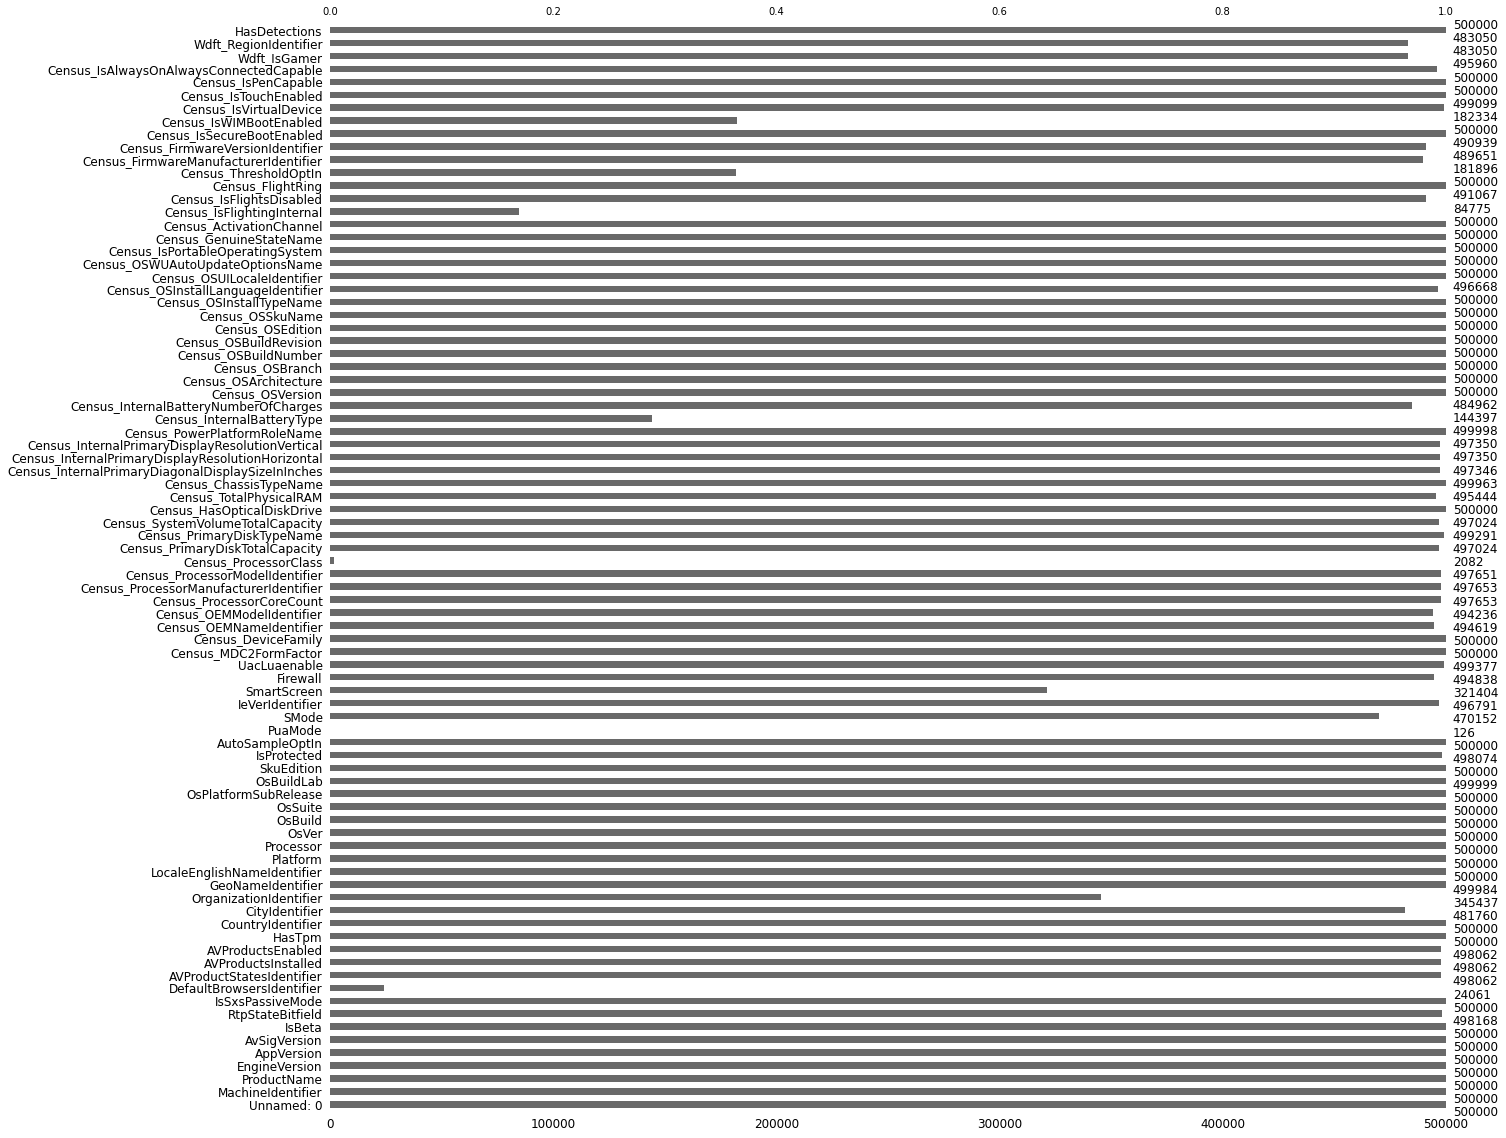

In [ ]:
msno.bar(df, figsize= (20,20), fontsize=12)

In general, it can be observed that DeafultBrowserIdentifier, Census_ProssesorClas, as well as other variables contain a large proportion of null values, so their elimination could be considered.

### 1.5 Targuet distribution

In [ ]:
df['HasDetections'].mean()

0.499906

From the average it can be seen that almost 50 % of the computers have been detected with Malware.

Text(0.5, 1.0, 'Distribucion del target')

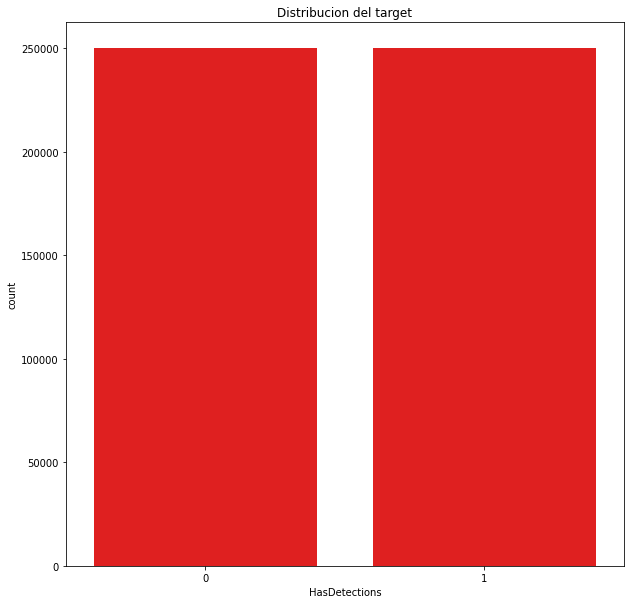

In [ ]:
plt.figure(figsize =(10,10))
sns.countplot(data= df, x= (df[target]), color= 'red')
plt.title('Distribucion del target')


With almost 250,000 observations we can observe an almost perfectly balanced target, with equal distributions in both positive and negative cases. This situation will be very good for the predictions of our model, since it does not train with a larger amount of information than + or -, and it does not generalize and harm neither negative nor positive cases.

#Multivariate analysis of the data

In [ ]:
df_1=df.copy()

##Attribute assignment.

In [ ]:
def obtener_lista_de_variables(dataset):
  lista_num= []
  lista_bool= []
  lista_cat= []

  for i in dataset:
    if (dataset[i].dtype.kind =='i' or dataset[i].dtype.kind == 'f') and i not in target and len(dataset[i].unique())!=2:
      lista_num.append(i)
    elif ((dataset[i].dtype.kind =='i' or dataset[i].dtype.kind == 'f') and i not in target and len(dataset[i].unique())==2) or dataset[i].dtype.kind =='b':
      lista_bool.append(i)
    elif(dataset[i].dtype.kind == 'O') and i not in target:
      lista_cat.append(i)
  return lista_num, lista_bool, lista_cat

In [ ]:
num_val, bool_val, cat_val= obtener_lista_de_variables(df_1)

In [ ]:
len(num_val) + len(bool_val) + len(cat_val) == 83


True

In [ ]:
categorical_list = cat_val
numeric_list = num_val
boolean_list = bool_val

In [ ]:
boolean_list

['IsBeta',
 'IsSxsPassiveMode',
 'HasTpm',
 'AutoSampleOptIn',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsWIMBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

In [ ]:
def extract_names(lst):
    categorical_identifier = []
    for i in lst:
        if "Identifier" in i:
             categorical_identifier.append(i)
    return  categorical_identifier

In [ ]:
identifier_list = extract_names(numeric_list)
identifier_list

['DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'IeVerIdentifier',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Wdft_RegionIdentifier']

In [ ]:
for i in categorical_list:
  df_1[i] = df_1[i].astype(object)

In [ ]:
numeric_list = list(filter(lambda x: x not in identifier_list, numeric_list))
numeric_list

['Unnamed: 0',
 'RtpStateBitfield',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_ThresholdOptIn',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer']

When doing more data analysis and understanding the 'business' it is very useful to correctly define what type of variable we are working with. Incorrectly python had assumed many Identifiers as numerical when they are not. Once this is done let's start analyzing the variables.

###""Identifier""

In [ ]:
identifier_list.remove('CountryIdentifier') #CountryIdentifier sera la unica variable de la lista que utilizaremos en el modelo.

In [ ]:
for i in identifier_list:
  df_1.drop(i, axis=1, inplace=True) 

Of the columns of identifiers, "identifier", we only consider relevant for the model the variables referring to the geographical location of the observation, and among these, the most influential is the country identifier. This is due to the fact that the countries in question have different security policies and freedoms with respect to the Internet and information technology, which could influence our analysis of "infected" or "not infected".

We consider that the rest of the identifiers do not contribute to the study since most of them are already included in other variables, and others do not contribute any information at all.

##Categoricals

In [ ]:
df_1['CountryIdentifier'] = list(map(str,df_1['CountryIdentifier'] ))
categorical_list.append('CountryIdentifier') #CountryIdentifier sera tratada como una categorica.

In [ ]:
categorical_list

###Nulls (cat)

In [ ]:
df_1[categorical_list].isna().sum()

MachineIdentifier                        0
ProductName                              0
EngineVersion                            0
AppVersion                               0
AvSigVersion                             0
Platform                                 0
Processor                                0
OsVer                                    0
OsPlatformSubRelease                     0
OsBuildLab                               1
SkuEdition                               0
PuaMode                             499874
SmartScreen                         178596
Census_MDC2FormFactor                    0
Census_DeviceFamily                      0
Census_ProcessorClass               497918
Census_PrimaryDiskTypeName             709
Census_ChassisTypeName                  37
Census_PowerPlatformRoleName             2
Census_InternalBatteryType          355603
Census_OSVersion                         0
Census_OSArchitecture                    0
Census_OSBranch                          0
Census_OSEd

The nulls are presented in the variables 'PuaMode', 'SmartScreen', 'Census_ProcessorClass', 'Census_InternalBatteryType', 'OsBuildLab' 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName'. Depending on the number of nulls and the distribution of the variable we will process them in different ways.

The variables 'PuaMode' and 'Census_ProcessorClass' have too small a proportion of nulls for the variable to have a positive impact on the model, so these variables will be eliminated.

In [ ]:
df_1.drop('PuaMode', axis=1, inplace=True)
df_1.drop('Census_ProcessorClass', axis=1, inplace=True)

On the other hand, the variables 'SmartScreen' and 'Census_InternalBatteryType' have a very large number of nulls, so the elimination of these rows would mean a large impact on the data set.
We chose to replace the values by extreme values since the model we are going to use is not sensitive to these values (outliers).

In [ ]:
df_1['SmartScreen'].describe()

count           321404
unique              12
top       RequireAdmin
freq            241594
Name: SmartScreen, dtype: object

In [ ]:
df_1['Census_InternalBatteryType'].describe()

count     144397
unique        28
top         lion
freq      113500
Name: Census_InternalBatteryType, dtype: object

In [ ]:
df_1['SmartScreen'].fillna(value= 'zzz', inplace=True) 

In [ ]:
df_1['Census_InternalBatteryType'].fillna(value= 'zzz', inplace=True)

As for the 'OsBuildLab' variables 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', we would like to eliminate these rows. Since not all of them would mean 0.14% of the total number of observations.

In [ ]:
dropna_list=['OsBuildLab', 'Census_PrimaryDiskTypeName','Census_ChassisTypeName', 'Census_PowerPlatformRoleName']
for i in dropna_list:
  df_1.dropna(subset = [i], inplace=True)

In [ ]:
def actualizar_lista (list):
  for i in list:
    if i not in df_1:
      list.remove(i)
  return list 

In [ ]:
categorical_list=actualizar_lista(categorical_list)

In [ ]:
df_1[categorical_list].isna().sum()

MachineIdentifier                   0
ProductName                         0
EngineVersion                       0
AppVersion                          0
AvSigVersion                        0
Platform                            0
Processor                           0
OsVer                               0
OsPlatformSubRelease                0
OsBuildLab                          0
SkuEdition                          0
SmartScreen                         0
Census_MDC2FormFactor               0
Census_DeviceFamily                 0
Census_PrimaryDiskTypeName          0
Census_ChassisTypeName              0
Census_PowerPlatformRoleName        0
Census_InternalBatteryType          0
Census_OSVersion                    0
Census_OSArchitecture               0
Census_OSBranch                     0
Census_OSEdition                    0
Census_OSSkuName                    0
Census_OSInstallTypeName            0
Census_OSWUAutoUpdateOptionsName    0
Census_GenuineStateName             0
Census_Activ

###Transformaciones

In [ ]:
for columns in categorical_list:
  print( columns, '\n', df_1[columns].describe(), '\n')

MachineIdentifier 
 count                               499271
unique                              499271
top       f1cd864e97bae82bdf96523e1a539121
freq                                     1
Name: MachineIdentifier, dtype: object 

ProductName 
 count           499271
unique               3
top       win8defender
freq            494302
Name: ProductName, dtype: object 

EngineVersion 
 count          499271
unique             53
top       1.1.15200.1
freq           216180
Name: EngineVersion, dtype: object 

AppVersion 
 count              499271
unique                 95
top       4.18.1807.18075
freq               288807
Name: AppVersion, dtype: object 

AvSigVersion 
 count           499271
unique            6453
top       1.273.1420.0
freq              5765
Name: AvSigVersion, dtype: object 

Platform 
 count        499271
unique            4
top       windows10
freq         483045
Name: Platform, dtype: object 

Processor 
 count     499271
unique         3
top          x64
freq 

In [ ]:
def explore_cat_values(dataframe, column):

  results_df = dataframe.pivot_table( index= column, values= target, aggfunc = [len,sum, np.mean])
  results_df.columns= ['suma', 'n_rows_infected', 'media_infectados']

  return results_df


In [ ]:
for columns in categorical_list:
       print('\n',explore_cat_values(df, columns),'\n', columns)
#no me termina de convencer esta funcion..... charlar con edu.


                                   suma  n_rows_infected  media_infectados
MachineIdentifier                                                        
000007905a28d863f6d0d597892cd692     1                0                 0
00003e5e679ccfe7a13e953c47dd584f     1                1                 1
00007a195c29a781fe18cc61a9f3a50b     1                1                 1
000090720df1dd004c5cf6cd1c615643     1                1                 1
00009736cef1cc093b94f6084eb26368     1                0                 0
...                                ...              ...               ...
ffff1ea2fc4c44aebbc3292ff4c658d9     1                1                 1
ffff22cd518ee6a0e0ef1fcdabde4071     1                0                 0
ffff4b3402d5742fec38f771dd5101b3     1                0                 0
ffffd173ebdb55a39b65ceef5db64f55     1                0                 0
ffffe845668e2b132716cbd523352e76     1                1                 1

[500000 rows x 3 columns] 
 Machine

MachineIdentifier works as an id so its categorical attribution is fine and does not represent anything for the dataset since each observation represents a different identifier, it does not make sense to see the distribution of the observations or countplot since there are 50000 different obsv. We delete it.

In [ ]:
df_1.drop('MachineIdentifier', axis=1, inplace=True)

Analyzing the rest of the categorical variables we chose to divide the action into three different transformations. 

The variables containing a single predominant majority value in their distribution will be converted to Boolean by separating the observations between those belonging to the majority group (1) and those not belonging to this group (0).

The variables that contain a more regular distribution of their values but do not exceed 60 different values will be transformed with a One Hot Encoding.

And the variables that exceed 60 different values and also meet a regular distribution of these values will be transformed with a Frequency Encoding.

In [ ]:
categorical_list=actualizar_lista(categorical_list)

If the most frequent value comprises more than 90% of the variable (450000 in freq) it is transformed to boolean.

In [ ]:
cat_to_bool = []
for i in categorical_list:
  if df_1[i].describe()['freq']>450000 :
    cat_to_bool.append(i)
cat_to_bool  #si el valor mas frecuente comprende mas del 90% de la variable transformamos a booleana (valor mas frecuente true o false)

['ProductName',
 'Platform',
 'Processor',
 'OsVer',
 'Census_DeviceFamily',
 'Census_OSArchitecture',
 'Census_FlightRing']

In [ ]:
def countplt (column):
  plt.figure(figsize = (10,3))
  sns.countplot(df_1[column])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

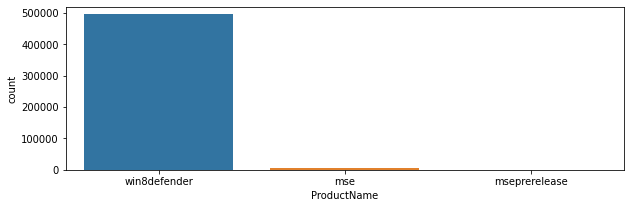

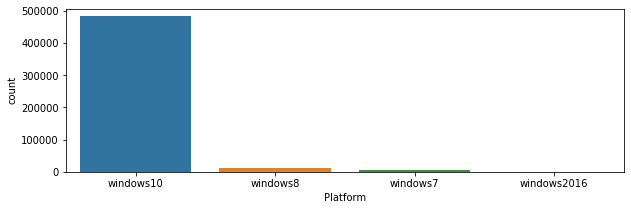

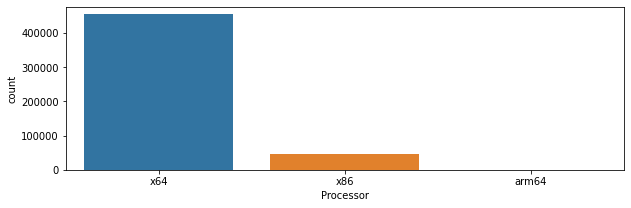

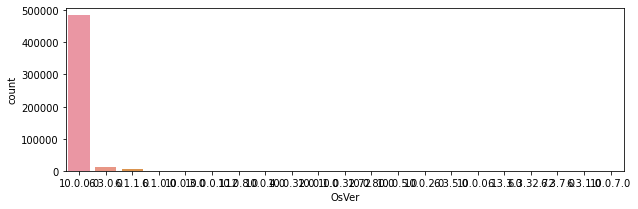

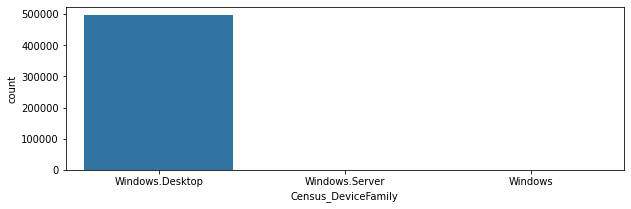

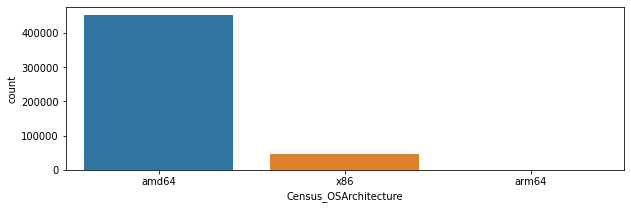

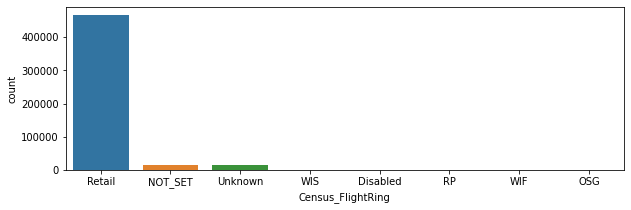

In [ ]:
for i in cat_to_bool:
  countplt(i)

In [ ]:
for i in cat_to_bool:
  mf_value = df_1[i].describe()['top']
  lista = list(map(lambda ele: ele == mf_value, df_1[i]))
  df_1[i + '_' + mf_value] = lista
  df_1.drop([i], axis=1, inplace=True)
#nuevas columnas booleanas ''nombre viejo'_'valor mas frecuente'', y elimino las columnas viejas.

In [ ]:
df_1['Processor_x64'].describe() #check

count     499271
unique         2
top         True
freq      453832
Name: Processor_x64, dtype: object

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499271 entries, 0 to 499999
Data columns (total 65 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         499271 non-null  int64  
 1   EngineVersion                                      499271 non-null  object 
 2   AppVersion                                         499271 non-null  object 
 3   AvSigVersion                                       499271 non-null  object 
 4   IsBeta                                             499271 non-null  int64  
 5   RtpStateBitfield                                   497448 non-null  float64
 6   IsSxsPassiveMode                                   499271 non-null  int64  
 7   AVProductsInstalled                                497333 non-null  float64
 8   AVProductsEnabled                                  497333 non-null  float6

###One Hot Eencoding

In [ ]:
def OHE(dataframe, column_name):

  _dummy_dataset = pd.get_dummies(dataframe[column_name], prefix = column_name)
  dataframe = pd.concat([dataframe,_dummy_dataset ], axis = 1)
  dataframe.drop(column_name, axis = 1 , inplace = True)

  return dataframe

In [ ]:
categorical_list = actualizar_lista(categorical_list)

In [ ]:
categorical_list

In [ ]:

cat_to_OHE = []
for i in df_1.select_dtypes(exclude = np.number).columns:
  if df_1[i].describe()['unique']<60:
    cat_to_OHE.append(i)
cat_to_OHE                                    #Al ejecutar esta linea del netbook Python nos da error sin un motivo evidente.
                                              #Con solo ejecutar las dos linesa anteriores nuevamente el error ya no aparece.

In [ ]:
for i in cat_to_OHE:
  df_1 = OHE(df_1, i)

In [ ]:
categorical_list= actualizar_lista(categorical_list)
categorical_list

###Frequency Encoder

In [ ]:
a, b, cat_mayor_60 = obtener_lista_de_variables(df_1)

In [ ]:
cat_mayor_60

['AppVersion',
 'AvSigVersion',
 'CountryIdentifier',
 'OsBuildLab',
 'Census_OSVersion']

In [ ]:
for i in cat_mayor_60:
  print(df_1[i].nunique() >= 60) #check

True
True
True
True
True


In [ ]:
def freq_encoder(dataframe, column):
 df_col = pd.DataFrame(dataframe[column].value_counts(dropna=False))
 df_col.columns = [f'{column}_count']
 df_col[column] = df_col.index
 dataframe = dataframe.merge(df_col, on=column)
 dataframe.drop(column, axis=1, inplace=True)
 
 return dataframe

In [ ]:
for i in cat_mayor_60:
  df_1 = freq_encoder(df_1, i)

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499271 entries, 0 to 499270
Columns: 310 entries, Unnamed: 0 to Census_OSVersion_count
dtypes: float64(22), int64(20), uint8(268)
memory usage: 291.4 MB


We no longer have variables of type 'object' in the data set. This was the purpose of the transformations of the categorical variables.

##Numericals


In [ ]:
df_1[numeric_list].isna().sum()

Unnamed: 0                                                0
RtpStateBitfield                                       1823
AVProductsInstalled                                    1938
AVProductsEnabled                                      1938
OsBuild                                                   0
OsSuite                                                   0
IsProtected                                            1926
SMode                                                 29808
Firewall                                               4812
UacLuaenable                                            619
Census_ProcessorCoreCount                              2338
Census_PrimaryDiskTotalCapacity                        2971
Census_SystemVolumeTotalCapacity                       2971
Census_TotalPhysicalRAM                                4546
Census_InternalPrimaryDiagonalDisplaySizeInInches      2529
Census_InternalPrimaryDisplayResolutionHorizontal      2525
Census_InternalPrimaryDisplayResolutionV

In [ ]:
def sustituir_valores(dataframe, column, x):
  dataframe[column].fillna(value = x, inplace=True)


In [ ]:
#Census_IsAlwaysOnAlwaysConnectedCapable  
df_1['Census_IsAlwaysOnAlwaysConnectedCapable'].value_counts(dropna=False)
sustituir_valores(df_1, 'Census_IsAlwaysOnAlwaysConnectedCapable',  0)


In [ ]:
#Wdft_IsGamer            
df_1['Wdft_IsGamer'].value_counts(dropna=False)
sustituir_valores(df_1, 'Wdft_IsGamer',  0)


In [ ]:
#RtpStateBitfield  #categroica
df_1['RtpStateBitfield'].value_counts(dropna= False)
sustituir_valores(df_1, 'RtpStateBitfield', -1)

In [ ]:
#AVProductsInstalled 
df_1['AVProductsInstalled'].value_counts(dropna= False)
sustituir_valores(df_1, 'AVProductsInstalled', 1)

In [ ]:
#AVProductsEnabled 
df['AVProductsEnabled'].value_counts(dropna= False)
sustituir_valores(df_1, 'AVProductsEnabled', -4)


In [ ]:
#IsProtected ??? Mode? o eliminar 
df_1['IsProtected'].value_counts(dropna= False)
sustituir_valores(df_1, 'IsProtected', 1)

In [ ]:
#SMode 
df_1['SMode'].value_counts(dropna= False)
sustituir_valores(df_1, 'SMode', 0)


In [ ]:
#Firewall  
df_1['Firewall'].value_counts(dropna= False)
sustituir_valores(df_1, 'Firewall', 1)


In [ ]:
#UacLuaenable #borrar   ?????
df_1['UacLuaenable'].value_counts(dropna= False)

1.0          495605
0.0            3032
NaN             619
48.0             13
6357062.0         1
2.0               1
Name: UacLuaenable, dtype: int64

In [ ]:
df_1.drop('UacLuaenable', axis=1, inplace=True)

In [ ]:
#Census_PrimaryDiskTotalCapacity  
df_1['Census_PrimaryDiskTotalCapacity'].value_counts(dropna= False).sort_values()
sustituir_valores(df_1, 'Census_PrimaryDiskTotalCapacity',  800000)


In [ ]:
#Census_ProcessorCoreCount #categorica
df_1['Census_ProcessorCoreCount'].value_counts(dropna= False)
sustituir_valores(df_1, 'Census_ProcessorCoreCount',  99)

In [ ]:
#Census_SystemVolumeTotalCapacity #num
df_1['Census_SystemVolumeTotalCapacity'].value_counts(dropna= False).sort_values()
sustituir_valores(df_1, 'Census_SystemVolumeTotalCapacity',  1000000)

In [ ]:
#Census_TotalPhysicalRAM
df_1['Census_TotalPhysicalRAM'].describe()
sustituir_valores(df_1, 'Census_TotalPhysicalRAM',  435)

In [ ]:
#Census_InternalPrimaryDiagonalDisplaySizeInInches    
df_1['Census_InternalPrimaryDiagonalDisplaySizeInInches'].value_counts(dropna= False).sort_values()  
df_1['Census_InternalPrimaryDiagonalDisplaySizeInInches'].describe()
sustituir_valores(df_1, 'Census_InternalPrimaryDiagonalDisplaySizeInInches',  3.5)

In [ ]:
#Census_InternalPrimaryDisplayResolutionHorizontal
df_1['Census_InternalPrimaryDisplayResolutionHorizontal'].describe()
sustituir_valores(df_1, 'Census_InternalPrimaryDisplayResolutionHorizontal',  14500)

In [ ]:
#Census_InternalPrimaryDisplayResolutionVertical       
df_1['Census_InternalPrimaryDisplayResolutionVertical'].describe()
sustituir_valores(df_1, 'Census_InternalPrimaryDisplayResolutionVertical',  5600)


In [ ]:
#Census_InternalBatteryNumberOfCharges                 
df_1['Census_InternalBatteryNumberOfCharges'].describe()
sustituir_valores(df_1, 'Census_InternalBatteryNumberOfCharges',  9.5)



In [ ]:
#Census_IsFlightingInternal                  
df_1['Census_IsFlightingInternal'].value_counts(dropna= False).sort_values()  
df_1.drop('Census_IsFlightingInternal',axis= 1 ,inplace= True)


In [ ]:
#Census_ThresholdOptIn booleana 47 obs ---1 , resto nulos y 0
df_1['Census_ThresholdOptIn'].value_counts(dropna= False).sort_values() 
df_1.drop('Census_ThresholdOptIn', axis=1, inplace=True)



In [ ]:
#Census_IsFlightsDisabled           booleana 7 obs--1, 491060--0, resto nulos
df_1['Census_IsFlightsDisabled'].value_counts(dropna= False).sort_values() 
df_1.drop('Census_IsFlightsDisabled', axis=1, inplace=True)

In [ ]:
#Census_IsVirtualDevice    
df_1['Census_IsVirtualDevice'].value_counts(dropna= False).sort_values() 
sustituir_valores(df_1, 'Census_IsVirtualDevice',  0)



##Booleans

In [ ]:
boolean_list

['IsBeta',
 'IsSxsPassiveMode',
 'HasTpm',
 'AutoSampleOptIn',
 'Census_HasOpticalDiskDrive',
 'Census_IsPortableOperatingSystem',
 'Census_IsSecureBootEnabled',
 'Census_IsWIMBootEnabled',
 'Census_IsTouchEnabled',
 'Census_IsPenCapable']

In [ ]:
boolean_list = actualizar_lista(boolean_list)

In [ ]:
for columns in boolean_list:
  print( columns, '\n', df_1[columns].value_counts(), '\n')

IsBeta 
 0    499270
1         1
Name: IsBeta, dtype: int64 

IsSxsPassiveMode 
 0    490650
1      8621
Name: IsSxsPassiveMode, dtype: int64 

HasTpm 
 1    493608
0      5663
Name: HasTpm, dtype: int64 

AutoSampleOptIn 
 0    499257
1        14
Name: AutoSampleOptIn, dtype: int64 

Census_HasOpticalDiskDrive 
 0    460755
1     38516
Name: Census_HasOpticalDiskDrive, dtype: int64 

Census_IsPortableOperatingSystem 
 0    499010
1       261
Name: Census_IsPortableOperatingSystem, dtype: int64 

Census_IsSecureBootEnabled 
 0    256786
1    242485
Name: Census_IsSecureBootEnabled, dtype: int64 

Census_IsWIMBootEnabled 
 0.0    181629
Name: Census_IsWIMBootEnabled, dtype: int64 

Census_IsTouchEnabled 
 0    436585
1     62686
Name: Census_IsTouchEnabled, dtype: int64 

Census_IsPenCapable 
 0    480403
1     18868
Name: Census_IsPenCapable, dtype: int64 



Census_IsWIMBootEnabled has a value of 0 only, so it will be removed.

In [ ]:
df_1.drop('Census_IsWIMBootEnabled', axis=1, inplace=True)

And the variables IsBeta, AutoSampleOptIn, Census_IsPortableOperatingSystem also have very little variability, so they will be similarly eliminated.

In [ ]:
for i in ['IsBeta', 'AutoSampleOptIn', 'Census_IsPortableOperatingSystem']:
  df_1.drop(i, axis=1, inplace=True)

In [ ]:
df_1.drop('Unnamed: 0', axis= 1, inplace= True)


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499271 entries, 0 to 499270
Columns: 301 entries, RtpStateBitfield to Census_OSVersion_count
dtypes: float64(17), int64(16), uint8(268)
memory usage: 257.1 MB


In [ ]:
df_1.isna().sum().sum()

0

#Modeling

##Random holdout

In [ ]:
#Modelling

In [ ]:
train_test_split?


In [ ]:
X= df_1.drop(target, axis=1)
y= df_1[[target]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size = .25)

In [ ]:
y_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
HasDetections,374453.0,0.500212,0.500001,0.0,0.0,1.0,1.0,1.0


In [ ]:
y_test.describe()

##Launching model

In [ ]:
dt = DecisionTreeClassifier(max_depth= 7, min_samples_split= 50, random_state=42)

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=42)

In [ ]:
test_tree = export_graphviz(dt, 
                            out_file=None,
                            max_depth=None,
                            feature_names= X_test.columns,
                            class_names=['Not infected', 'Infected'],
                            label='all', 
                            filled=True, 
                            leaves_parallel=False, 
                            impurity=True, 
                            node_ids=False,
                            proportion=True,
                            rotate=True, 
                            rounded=False, 
                            special_characters=False, 
                            precision=3, 
                            fontname='helvetica')

In [ ]:
export_graphviz?

In [ ]:
graphviz.Source(test_tree)

##Model evluation

In [ ]:
y_predict = pd.DataFrame(dt.predict(X_test), index= y_test.index, columns = ['Infected_predict'])
y_predict

,Infected_predict
266696,0
75308,1
152839,1
494397,1
33877,1
...,...
345561,0
97202,1
238214,1
448955,0


In [ ]:
results = y_test.join(y_predict)
results

In [ ]:
results['Success'] = (results['HasDetections'] == results['Infected_predict']).astype(int)

In [ ]:
results['Success'].mean()

0.6134852345014341

In [ ]:
 #Precission

 dt.score(X_test, y_test)

0.6134852345014341

In [ ]:
#f_1score
metrics.f1_score(y_test, y_predict)

0.5783530563372897

In [ ]:
y_score = pd.DataFrame(dt.predict_proba(X_test)[:, 1], index= X_test.index, columns= ['Infected_score'])
results = results.join(y_score)

In [ ]:
results

In [ ]:
metrics.roc_auc_score(results['HasDetections'], results['Infected_score'])

0.6696274884583049

In [ ]:
fpr, tpr, th = metrics.roc_curve(results['HasDetections'], results['Infected_score'])

In [ ]:
plt.figure(figsize= (10,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], color= 'black', linestyle = '--')
plt.title('ROC Curve')
plt.ylabel('TPR')
plt.xlabel('FPR')

In [ ]:
# Controlar el overfitting
for i in range(1, 18):
  dt = DecisionTreeClassifier(max_depth= i, min_samples_split= 50, random_state=42)
  dt.fit(X_train, y_train)
  train_acc = dt.score(X_train, y_train)
  test_acc = dt.score(X_test, y_test)

  print(f'profundidad del arbol: {i}, accuracy en train: {train_acc}, accuracy en test: {test_acc}, overfit: {train_acc- test_acc}')


It can be seen that between depths 6 and 10 would be the values to choose since at depth 10 the test accuracy stops growing and at depth 6 there is an increase in overfitting.

In [ ]:
###Random Forest

In [ ]:
dt_rf = RandomForestClassifier(n_estimators = 3, max_depth = 4, random_state = 42)

In [ ]:
dt_rf.fit(X_train, np.ravel(y_train))

RandomForestClassifier(max_depth=4, n_estimators=3, random_state=42)

In [ ]:
dt_estimators = dt_rf.estimators_


In [ ]:
 test_tree_0 = export_graphviz(dt_estimators[0], 
                            out_file=None,
                            max_depth=None,
                            feature_names= X_test.columns,
                            class_names=['Not infected', 'Infected'],
                            label='all', 
                            filled=True, 
                            leaves_parallel=False, 
                            impurity=True, 
                            node_ids=False,
                            proportion=True,
                            rotate=True, 
                            rounded=False, 
                            special_characters=False, 
                            precision=3, 
                            fontname='helvetica')

In [ ]:
graphviz.Source(test_tree_0)

In [ ]:
#Precission
dt_rf.score(X_test, y_test)

0.6039753881651685

In [ ]:
y_predict = pd.DataFrame(dt.predict(X_test), index= y_test.index, columns = ['Infected_predict'])
resulatdo = y_test.join(y_predict)
resulatdo['Success'] = (resulatdo['HasDetections'] == resulatdo['Infected_predict']).astype(int)
resulatdo['Success'].mean()


0.6138217244307712

In [ ]:
resulatdo

In [ ]:
metrics.f1_score(X_test, y_predict)

In [ ]:
y_score = pd.DataFrame(dt.predict_proba(X_test)[:, 1], index= X_test.index, columns= ['Infected_score'])
resulatdo = resulatdo.join(y_score)

In [ ]:
metrics.roc_auc_score(resulatdo['HasDetections'], resulatdo['Infected_score'])

0.6699887623050917

##CrossValidation

In [ ]:
KFold??

In [ ]:
kfold = KFold(n_splits = 10, shuffle = True) 

LIST_SCORES = []

for train_idx, val_idx in kfold.split(X_train, y_train):
    
    X_train_ = X_train.iloc[train_idx]
    y_train_ = y_train.iloc[train_idx]
    
    X_val_ = X_train.iloc[val_idx]
    y_val_ = y_train.iloc[val_idx]
    
    dt = DecisionTreeClassifier(max_depth= 7, min_samples_split= 50, random_state=42) # nuevo modelo en cada iteracción
    dt.fit(X_train_, y_train_)
    y_predict = pd.DataFrame(dt.predict(X_val_), index= y_val_.index, columns = ['Infected_predict'])
    
    score_ = accuracy_score(y_true = y_val_, y_pred = y_predict)
    LIST_SCORES.append(score_)

In [ ]:
LIST_SCORES

In [ ]:
pd.DataFrame(LIST_SCORES).mean()

#Conclusion

The development of the solution to the problem of predicting the infection of Windows with malware consisted of importing, analyzing, preprocessing and transforming the data. For its subsequent implementation in a decision tree algorithm to generate a classification model (infected or not infected), and its subsequent evaluation.

In the work done on the Netbook the steps carried out were: The import of the data as mentioned above. A first visualization, examination and analysis of these data, in order to achieve a clear and deep understanding of them, and thus be able to give a "business view" to the situation. Once this was done, the next step was to perform the cleaning and preprocessing, along with the appropriate transformations, this part is essentially the selection of relevant attributes, the treatment of null values, and the processing of categorical variables. And in the last stage, the generation of the model and its subsequent evaluation. These steps are explained in detail in the project development.

Regarding the evaluation of the model. The algorithm used is the "DecisionTreeClassifier" of sklearn and the metrics used for its evaluation were the 'accuracy' and the 'f1 score', as well as the ROC curve. The accuracy obtained by our model is 0.61, which is good since our target has a 50/50 distribution. The f1_score also gives an acceptable result of 0.57. And the ROC curve shows a drawing away from the straight line identity (X=Y) which is a good indication, with a value of 0.669.

Then a Random Forest was used to test a more comprehensive solution and the evaluative results were very similar.

Once the model was evaluated with these metrics and good results were obtained. The CrossValidation method was used to check that the method is not memorizing and generalizes well. The mean CrossValidation score is 0.61 which is within the expected values.